# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

Data from states0.csv

```csv
,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36 ",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74 ",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82 ",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63 ",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78 ",19087135M_19334329F
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,,"$64,657.80 ",2648667M_2630239F
```

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
# Loading multiple files
files = glob.glob('states*.csv')

data=[]
# loop through the files and read them in with pandas
for filename in files:
    dataset = pd.read_csv(filename)
    data.append(dataset)

# concatenate the dataframes
us_census = pd.concat(data)


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [3]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [4]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

* Variables in the "Hispanic-Income" range must be changed to float
* GenderPop must be restructured.

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [5]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [6]:
us_census.drop(['Unnamed: 0'], axis=1, inplace=True)

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [7]:
us_census.Income = us_census.Income.replace('[$,.]', '', regex=True).astype(float)

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [8]:
split_GenderPop = us_census.GenderPop.str.split('_', expand=True)

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [9]:
# Assigning the values to the columns
us_census['MalePop'] = split_GenderPop[0].replace('M', '', regex=True)
us_census['FemalePop'] = split_GenderPop[1].replace('F', '', regex=True)

# Convert the columns to numeric
us_census['MalePop'] = pd.to_numeric(us_census['MalePop'], errors='coerce').astype('Int64')
us_census['FemalePop'] = pd.to_numeric(us_census['FemalePop'], errors='coerce').astype('Int64')

# drop the original column
us_census.drop(columns=['GenderPop'], inplace=True)

us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,4329636.0,2341093,2489527
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,7035474.0,384160,349215
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,5420782.0,3299088,3342840
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,4193563.0,1451913,1506295
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,6726478.0,19087135,19334329


In [10]:
#us_census.reset_index(inplace=True)

In [11]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      60 non-null     object 
 1   TotalPop   60 non-null     int64  
 2   Hispanic   60 non-null     object 
 3   White      60 non-null     object 
 4   Black      60 non-null     object 
 5   Native     60 non-null     object 
 6   Asian      60 non-null     object 
 7   Pacific    55 non-null     object 
 8   Income     60 non-null     float64
 9   MalePop    60 non-null     Int64  
 10  FemalePop  57 non-null     Int64  
dtypes: Int64(2), float64(1), int64(1), object(7)
memory usage: 5.7+ KB


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

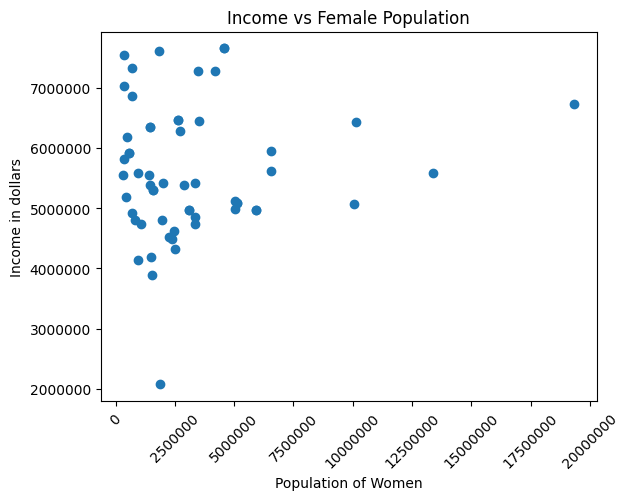

<Figure size 640x480 with 0 Axes>

In [12]:
def scatterplot():
    plt.scatter(x='FemalePop', y='Income', data=us_census)
    plt.title('Income vs Female Population')
    plt.xlabel('Population of Women')
    plt.ylabel('Income in dollars')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.tick_params(axis='x', rotation=45)
    plt.show()
    plt.clf()

scatterplot()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [13]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,4329636.0,2341093,2489527
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,7035474.0,384160,349215
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,5420782.0,3299088,3342840
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,4193563.0,1451913,1506295
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,6726478.0,19087135,19334329


In [14]:
# Listing the rows with null or nan values
us_census[us_census.isnull().any(axis=1)]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,6465780.0,2648667,2630239
0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,6465780.0,2648667,2630239
2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,6182798.0,448413,478041
1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,5388561.0,1439862,1453125
5,Maryland,5930538,8.47%,52.68%,30.68%,0.20%,5.33%,0.04%,7876540.0,2872643,<NA>
0,Maryland,5930538,8.47%,52.68%,30.68%,0.20%,5.33%,0.04%,7876540.0,2872643,<NA>
1,Montana,1014699,3.27%,86.42%,0.43%,7.06%,0.57%,0.07%,4764568.0,510163,<NA>
4,North Dakota,721640,2.83%,87.45%,1.28%,5.65%,0.96%,NaN,5818811.0,367963,353677


In [15]:
us_census['FemalePop'] = us_census['FemalePop'].fillna(us_census.TotalPop - us_census.MalePop)

In [16]:
# Listing the rows with null or nan values
us_census[us_census.isnull().any(axis=1)]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,6465780.0,2648667,2630239
0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,6465780.0,2648667,2630239
2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,6182798.0,448413,478041
1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,5388561.0,1439862,1453125
4,North Dakota,721640,2.83%,87.45%,1.28%,5.65%,0.96%,NaN,5818811.0,367963,353677


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [17]:
us_census.duplicated().any()

True

11. Drop those duplicates using the `.drop_duplicates()` function.

In [18]:
us_census.drop_duplicates(inplace=True)

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

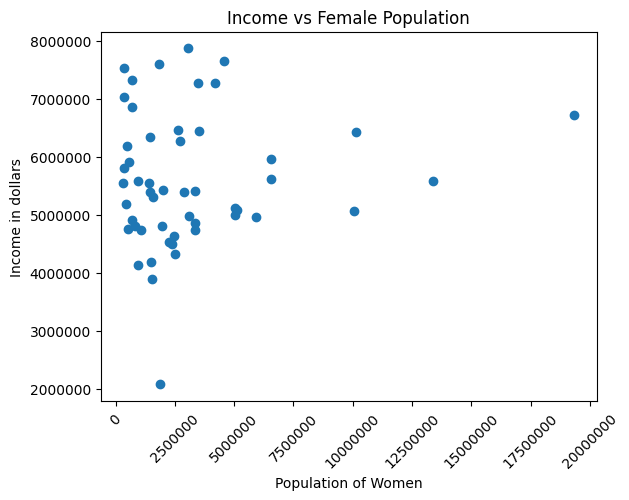

<Figure size 640x480 with 0 Axes>

In [19]:
scatterplot()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [20]:
us_census.columns.to_list()

['State',
 'TotalPop',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'Income',
 'MalePop',
 'FemalePop']

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [21]:
for column in us_census.columns.to_list():
    if us_census[column].dtype == 'object':
        us_census[column] = us_census[column].str.replace('%', '')

us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,4329636.0,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,7035474.0,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,5420782.0,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,4193563.0,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,6726478.0,19087135,19334329


In [22]:
PopList = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for rase in PopList:
    us_census[rase] = pd.to_numeric(us_census[rase], errors='coerce')

In [23]:
# I assume that Population in PoP list should add to 100%. Therefore, I will fill the nan values with the difference
us_census[PopList] = us_census[PopList].apply(lambda x: x.fillna(100 - x.sum()), axis=1)


# Listing the rows with null or nan values
us_census[us_census.isnull().any(axis=1)]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop


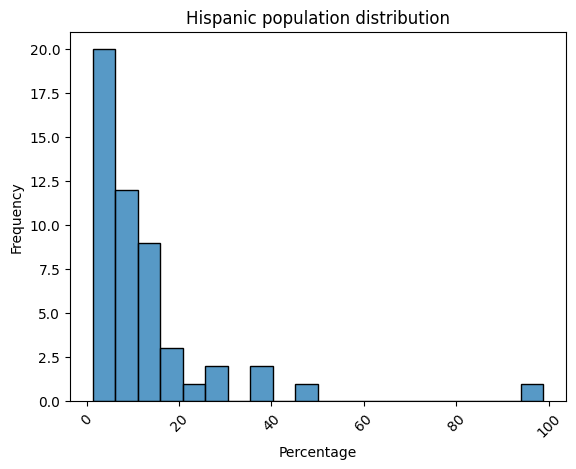

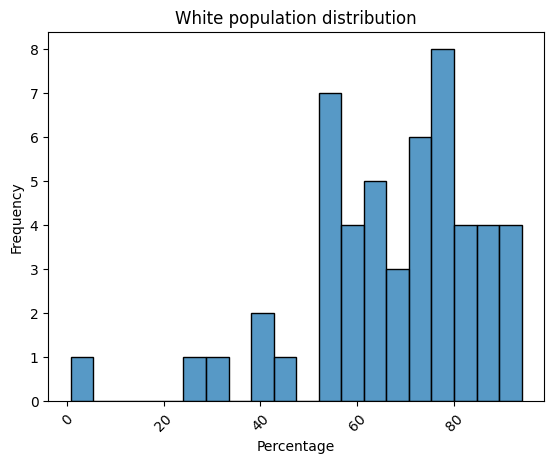

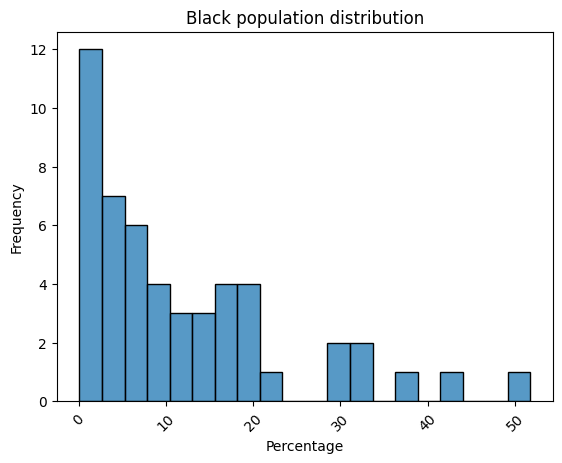

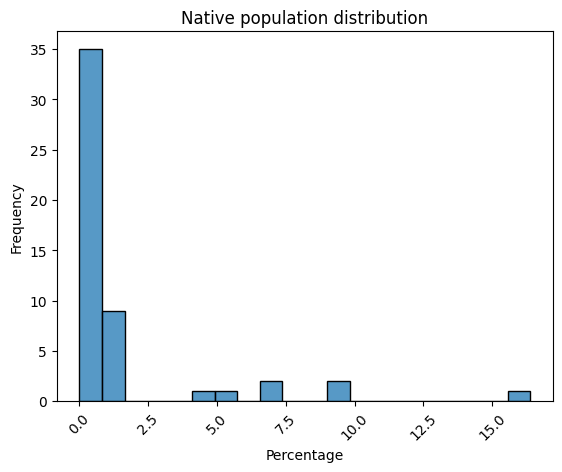

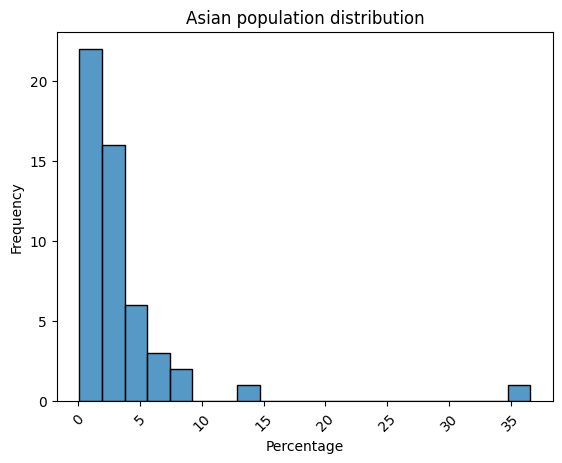

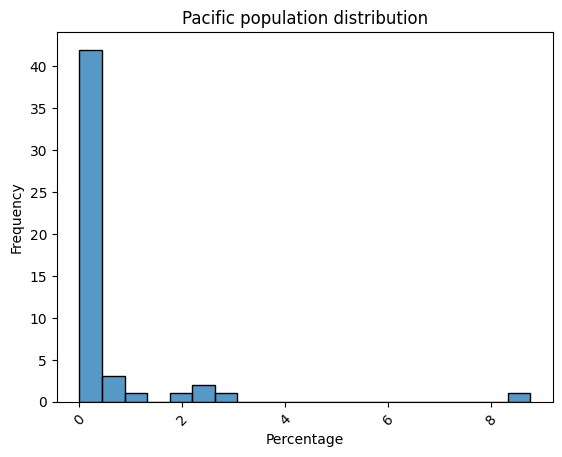

<Figure size 640x480 with 0 Axes>

In [24]:
for column in PopList:
    sns.histplot(us_census[column], bins=20)
    plt.tick_params(axis='x', rotation=45)
    plt.ylabel('Frequency')
    plt.xlabel('Percentage')
    plt.title(f'{column} population distribution')
    plt.show()
    plt.clf()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.

In [25]:
us_census_numerical = us_census.copy()

us_census_numerical = pd.get_dummies(us_census_numerical, columns=['State'], prefix='', prefix_sep='')
us_census_numerical.head()

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin
0,4830620,3.75,61.88,31.25,0.45,1.05,0.03,4329636.0,2341093,2489527,...,False,False,False,False,False,False,False,False,False,False
1,733375,5.91,60.91,2.85,16.39,5.45,1.06,7035474.0,384160,349215,...,False,False,False,False,False,False,False,False,False,False
2,6641928,29.57,57.12,3.85,4.36,2.88,0.17,5420782.0,3299088,3342840,...,False,False,False,False,False,False,False,False,False,False
3,2958208,6.22,71.14,18.97,0.52,1.14,0.15,4193563.0,1451913,1506295,...,False,False,False,False,False,False,False,False,False,False
4,38421464,37.29,40.22,5.68,0.41,13.05,0.35,6726478.0,19087135,19334329,...,False,False,False,False,False,False,False,False,False,False


In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_corr_heatmap(df, threshold=0.3, columns=None, cell_size=50, ignoreone=False):

    # Select specified columns if provided
    if columns is not None:
        df = df[columns]

    # Calculate the correlation matrix
    corr_matrix = df.corr()

    def filter_corr_matrix(corr_matrix, ignoreone, threshold):
        # Create a boolean matrix to identify correlations above the threshold
        bool_matrix = (corr_matrix.abs() > threshold)

        # Create a boolean matrix to identify cells 'equal' to 1
        ones_matrix = (corr_matrix.abs() > 0.98)

        if not ignoreone:
            mask = (bool_matrix.sum() > 1)
        if ignoreone:
            mask = ((bool_matrix.sum() > 1) & (ones_matrix.sum() == 1))

        # Apply the mask to the correlation matrix to filter out desired variables
        filtered_corr_matrix = corr_matrix.loc[mask, mask]
        return filtered_corr_matrix

    # Filter the correlation matrix based on the ignoreone parameter
    filtered_corr_matrix = filter_corr_matrix(corr_matrix, ignoreone, threshold)

    # Check if there are any variables remaining after filtering
    if not filtered_corr_matrix.empty:
        # Create a subplot with a dropdown menu
        fig = make_subplots(rows=1, cols=1, subplot_titles=['Heatmap of Variables with Correlations > {}'.format(threshold)])

        # Define color thresholds in 0.1 increments from -1 to 1
        bounds = [round(x * 0.1, 1) for x in range(-10, 11)]
                
        # Create a colorscale function
        def create_colorscale(threshold):
            colorscale = []
            for i in range(len(bounds)):
                if abs(bounds[i]) < threshold:
                    colorscale.append([i / (len(bounds) - 1), 'rgb(200,200,200)'])
                else:
                    if bounds[i] < 0:
                        # For negative values - shades from rgb(100,180,200) to rgb(200,200,200)
                        normalized_value = (bounds[i] + 1) / (1 - threshold)  # Normalize values to the range [0, 1].
                        color = (
                            int(100 + normalized_value * 100),
                            int(180 + normalized_value * 20),
                            200
                        )
                    else:
                        # For positive values - shades from rgb(200,200,200) to rgb(220,100,100)
                        normalized_value = (bounds[i] - threshold) / (1 - threshold)  # Normalize values to the range [0, 1].
                        color = (
                            220,
                            int(200 - normalized_value * 100),
                            int(200 - normalized_value * 100)
                        )
                    colorscale.append([i / (len(bounds) - 1), f'rgb{color}'])
            return colorscale

        colorscale = create_colorscale(threshold)
        
        # Create the heatmap trace
        trace = go.Heatmap(
            z=filtered_corr_matrix,
            x=filtered_corr_matrix.columns,
            y=filtered_corr_matrix.index,
            colorscale=colorscale,
            #reversescale=True,
            zmid=0,
            zmin=-1,
            zmax=1,
            text=filtered_corr_matrix.applymap("{:.2f}".format),
            texttemplate="%{text}",
            textfont=dict(size=10),
            hoverinfo='text',
            colorbar=dict(title='Correlation',
            titleside='top',
            tickmode='array',
            tickvals=bounds,
            ticktext=[str(val) for val in bounds])
            )

        # Add the initial heatmap trace to the subplot
        fig.add_trace(trace, row=1, col=1)

        # Create dropdown menu options
        dropdown_options = [
            {'label': 'Reset', 'method': 'update', 'args': [{'y': [filtered_corr_matrix.index], 'z': [filtered_corr_matrix.values]},
                                                            {'layout': {'width': cell_size * len(filtered_corr_matrix.columns),
                                                                        'height': cell_size * len(filtered_corr_matrix.columns)}}]}
        ] + [
            {'label': col, 'method': 'update', 'args': [{'y': [col], 'z': [filtered_corr_matrix.loc[col].values.reshape(1, -1)]},
                                                         {'layout': {'width': cell_size * len(filtered_corr_matrix.columns),
                                                                    'height': cell_size}}]}
            for col in filtered_corr_matrix.columns
        ]
        
        dropdown = dict(
            buttons=dropdown_options,
            direction='down',
            showactive=True,
            x=0.8,
            y=1.15,
            xanchor='left',
            yanchor='top'
        )



        # Create the layout with the dropdown menu
        fig.update_layout(
            updatemenus=[dropdown],
            title=f'Heatmap of Variables with Correlations > {threshold}',
            xaxis=dict(side='bottom'),
            yaxis=dict(side='left', autorange='reversed'),
            width=cell_size * len(filtered_corr_matrix.columns),
            height=cell_size * len(filtered_corr_matrix.columns)
        )

        # Display the plot
        fig.show()
    else:
        print(f"No variables found with correlations above the threshold of {threshold}.")


In [32]:
create_corr_heatmap(us_census_numerical, threshold=0.3, columns=None, cell_size=70, ignoreone=True)

C:\Users\DataScience\AppData\Local\Temp\ipykernel_47356\871024122.py:78: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

